In [31]:
import tflearn as tf
import tflearn.datasets.mnist as mnist
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

import tensorflow as TF
TF.reset_default_graph()

In [32]:
X, Y, testX, testY = mnist.load_data(one_hot=True)

input_layer = tf.input_data(shape=[None, 784])
net1 = tf.fully_connected(input_layer, 64, activation='relu')
net2 = tf.fully_connected(net1, 32, activation='relu')
net3 = tf.fully_connected(net2, 10, activation='softmax')
net4 = tf.regression(net3, optimizer='Adam', loss='categorical_crossentropy')

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [33]:
model = tf.DNN(net4)

if not os.path.isfile('20_trained_model.tflearn.index'):
    model.fit(X, Y, n_epoch=20, validation_set=[testX, testY], show_metric=True, run_id='dense_model')
    model.save('20_trained_model.tflearn')
else:
    model.load('20_trained_model.tflearn')

INFO:tensorflow:Restoring parameters from /home/viraat-chandra/Workspace/Machine_Learning/Tensorflow_VENV/Projects/others/MNIST_Testing/20_trained_model.tflearn


In [34]:
def get_title(x):
    return str(np.argmax(x))

def show_image(x, pred=None):
    plt.imshow(testX[x].reshape([28, 28]), cmap='gray_r')
    plt.title(get_title(testY[x]) + ' - {}'.format(get_title(pred)))
    plt.show()

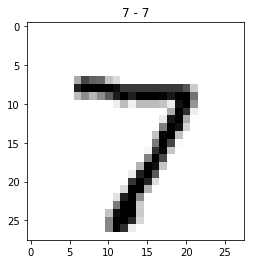

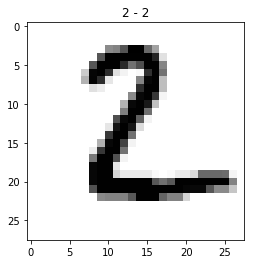

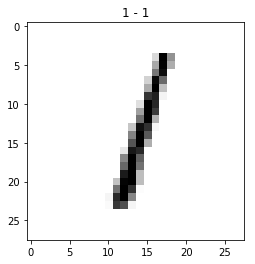

In [45]:
for i in range(3):
    show_image(i, model.predict([testX[i]]))